# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [2]:
train = pd.read_csv('data/training_set_VU_DM.csv')
test = pd.read_csv('data/test_set_VU_DM.csv')

In [3]:
print(train.shape)
train.head()

(4958347, 54)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [4]:
print(test.shape)
test.head()

(4959183, 50)


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
set(train.columns) - set(test.columns)

{'booking_bool', 'click_bool', 'gross_bookings_usd', 'position'}

In [7]:
train.isna().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [8]:
print('Number of queries: ', len(train['srch_id'].unique()))
print('Number of sites: ', len(train['site_id'].unique()))
print('Number of properties: ', len(train['prop_id'].unique()))

Number of queries:  199795
Number of sites:  34
Number of properties:  129113


### Duplicates

In [9]:
train[train.duplicated(keep=False)]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool


### Missing values

In [10]:
def draw_filled_data(data):
    ((~data.isna()).sum() * 100 / len(train)).sort_values().plot.bar()
    plt.show()

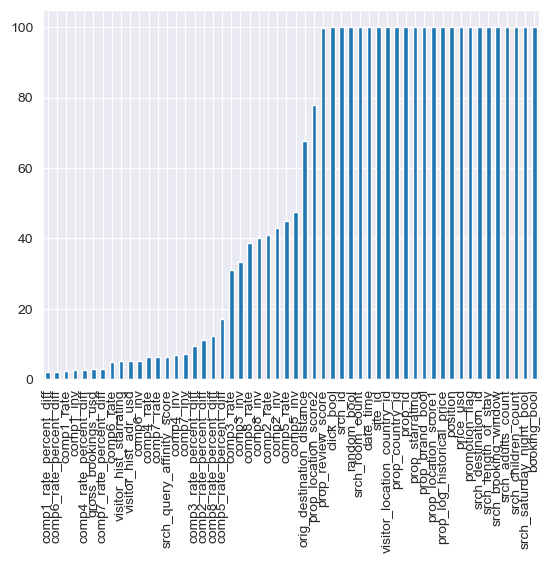

In [11]:
draw_filled_data(train)

In [12]:
def calculate_proportion_of_dropped_data(data, threshold=0.8):
    cols_to_drop = data.columns[data.isna().sum() / len(data) > threshold].values
    # print(cols_to_drop)
    upd_data = data.drop(cols_to_drop, axis=1)
    print(f'{data.shape} -> {upd_data.shape}')

    return (~upd_data.isna()).sum().sum() / (~data.isna()).sum().sum(), cols_to_drop

In [13]:
remain_info, cols_to_drop = calculate_proportion_of_dropped_data(train)
remain_info

(4958347, 54) -> (4958347, 34)


0.9596050284825186

In [14]:
# # Dropping NA (optional)
# data = train.drop(cols_to_drop, axis=1)
# data.head()

In [15]:
data = train.copy()

#### Filling in missing values

1. Property ratings

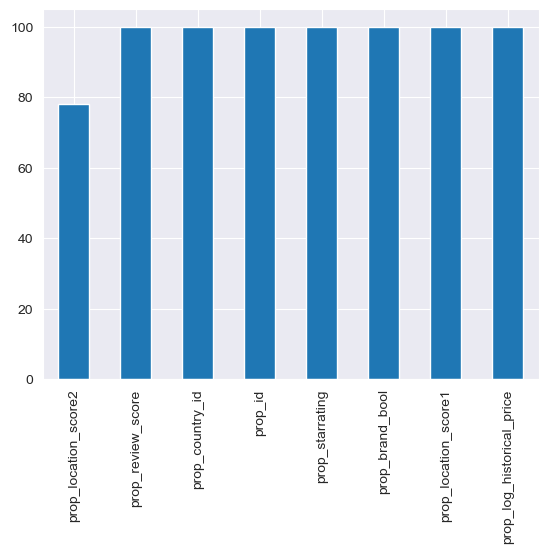

In [16]:
draw_filled_data(data.filter(regex=("^prop_.*$")))

We will fill the score for location with negative value.

In [17]:
data['prop_location_score2'] = data['prop_location_score2'].fillna(-1)

<Axes: >

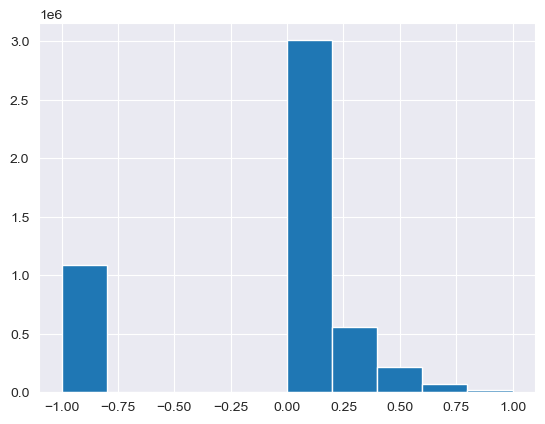

In [18]:
data.prop_location_score2.hist()

2. Search criterea

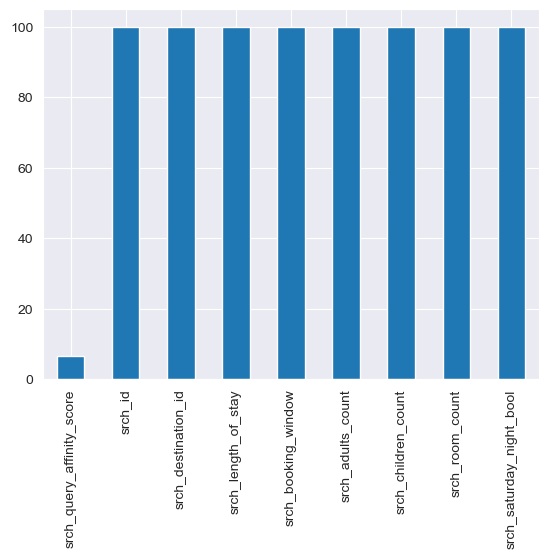

In [19]:
draw_filled_data(data.filter(regex=("^srch_.*$")))

'srch_query_affinity_score' log of probability of the hotel being clicked in the websearch. No data - worst scenario.

In [20]:
data['srch_query_affinity_score'] = data['srch_query_affinity_score'].fillna(-150)

<Axes: >

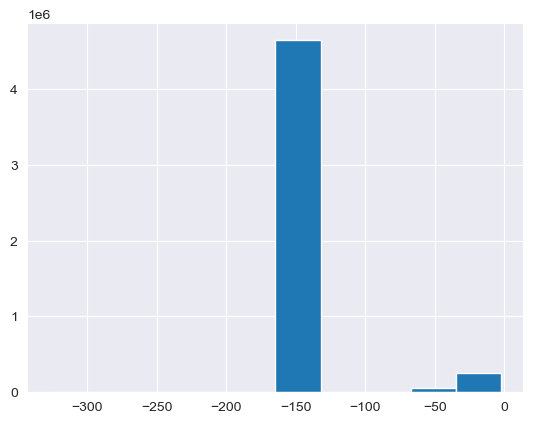

In [21]:
data.srch_query_affinity_score.hist()

3. Visitor data

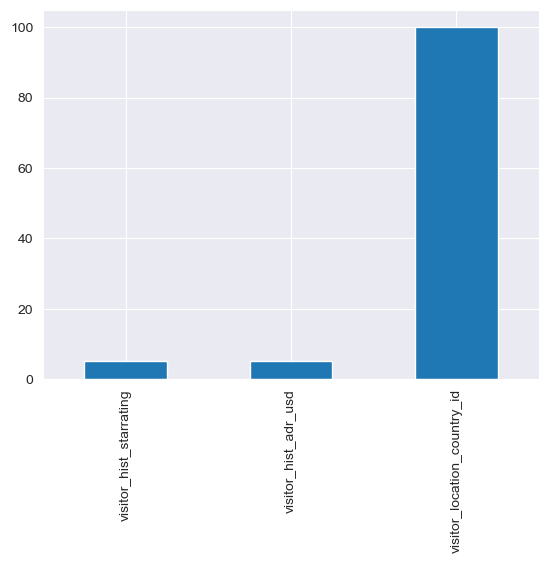

In [22]:
draw_filled_data(data.filter(regex=("^visitor_.*$")))

Less than 90% of historical data is present.

4. Competitors comparison

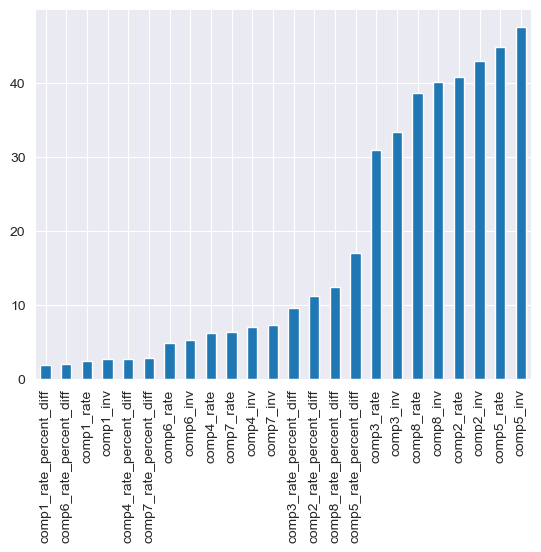

In [23]:
draw_filled_data(data.filter(regex=("^comp\d_.*$")))

Let all the values be zero for comparison with competitors.

In [24]:
for col in data.filter(regex=("^comp\d_.*$")).columns:
    data[col] = data[col].fillna(0)

5. Remove 'gross_bookings_usd' from dataset

In [25]:
print(data.shape)
data = data.drop(['gross_bookings_usd'], axis=1)
print(data.shape)

(4958347, 54)
(4958347, 53)


6. Fill in destination

In [26]:
data.filter(regex='^orig_.*$').dropna().min()

orig_destination_distance    0.01
dtype: float64

In [27]:
data.filter(regex='^orig_.*$').dropna().max()

orig_destination_distance    11666.64
dtype: float64

7. Checking for the NAs again

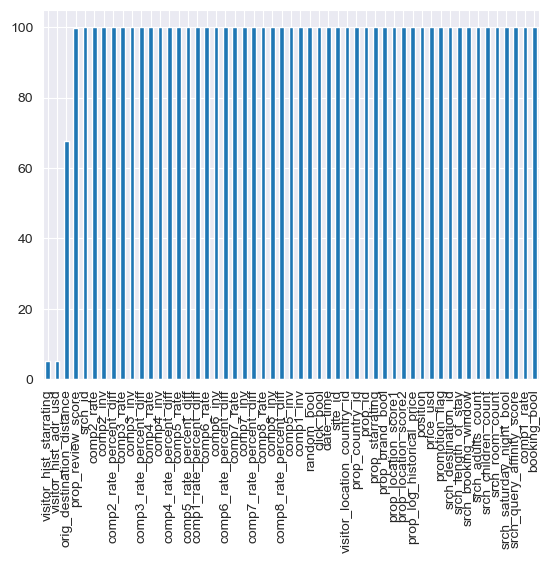

In [28]:
draw_filled_data(data)

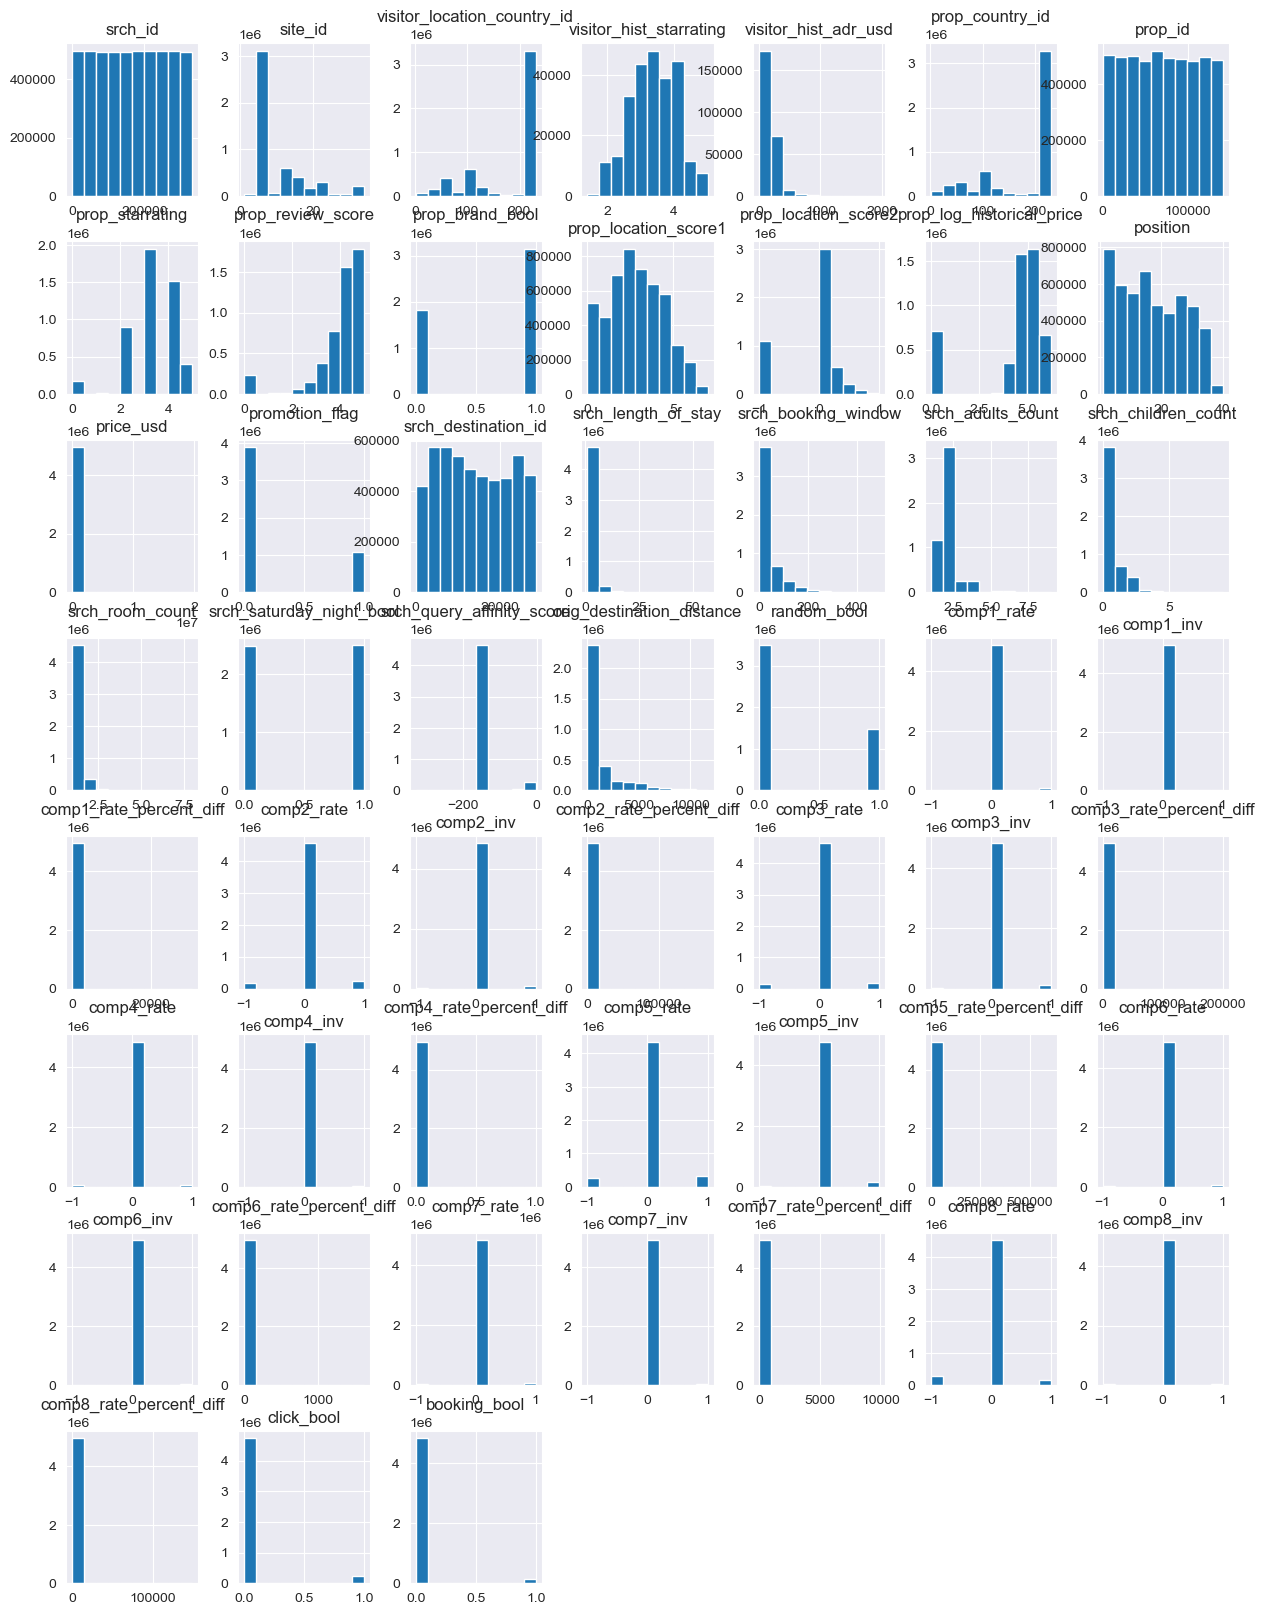

In [29]:
data.hist(figsize=(15, 20))
plt.show()

### Converting time to pandas datetime format.

In [30]:
data["date_time"] = pd.to_datetime(data["date_time"], infer_datetime_format=True)

In [31]:
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,5.0,0,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## Feature Extraction

## Dataset preparation

In [32]:
data.filter(regex="^.*_id$")

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,srch_destination_id
0,1,12,187,219,893,23246
1,1,12,187,219,10404,23246
2,1,12,187,219,21315,23246
3,1,12,187,219,27348,23246
4,1,12,187,219,29604,23246
...,...,...,...,...,...,...
4958342,332785,5,219,219,77700,16974
4958343,332785,5,219,219,88083,16974
4958344,332785,5,219,219,94508,16974
4958345,332785,5,219,219,128360,16974


In [33]:
ids_columns_list = data.filter(regex="^.*_id$").columns

In [34]:
data = data.set_index(['srch_id', 'prop_id'], drop=True)
data.head()

date_time  site_id  visitor_location_country_id  \
srch_id prop_id                                                             
1       893     2013-04-04 08:32:15       12                          187   
        10404   2013-04-04 08:32:15       12                          187   
        21315   2013-04-04 08:32:15       12                          187   
        27348   2013-04-04 08:32:15       12                          187   
        29604   2013-04-04 08:32:15       12                          187   

                 visitor_hist_starrating  visitor_hist_adr_usd  \
srch_id prop_id                                                  
1       893                          NaN                   NaN   
        10404                        NaN                   NaN   
        21315                        NaN                   NaN   
        27348                        NaN                   NaN   
        29604                        NaN                   NaN   

                 prop_country_id  prop_starrating  prop_review_score  \
srch_id prop_id                                                        
1       893                  219                3                3.5   
        10404                219                4                4.0   
        21315                219                3                4.5   
        27348                219                2                4.0   
        29604                219                4                3.5   

                 prop_brand_bool  prop_location_score1  ...  comp6_inv  \
srch_id prop_id                                         ...              
1       893                    1                  2.83  ...        0.0   
        10404                  1                  2.20  ...        0.0   
        21315                  1                  2.20  ...        0.0   
        27348                  1                  2.83  ...        0.0   
        29604                  1                  2.64  ...        0.0   

                 comp6_rate_percent_diff  comp7_rate  comp7_inv  \
srch_id prop_id                                                   
1       893                          0.0         0.0        0.0   
        10404                        0.0         0.0        0.0   
        21315                        0.0         0.0        0.0   
        27348                        0.0         0.0        0.0   
        29604                        0.0         0.0        0.0   

                 comp7_rate_percent_diff  comp8_rate  comp8_inv  \
srch_id prop_id                                                   
1       893                          0.0         0.0        0.0   
        10404                        0.0         0.0        0.0   
        21315                        0.0         0.0        0.0   
        27348                        0.0        -1.0        0.0   
        29604                        0.0         0.0        0.0   

                 comp8_rate_percent_diff  click_bool  booking_bool  
srch_id prop_id                                                     
1       893                          0.0           0             0  
        10404                        0.0           0             0  
        21315                        0.0           0             0  
        27348                        5.0           0             0  
        29604                        0.0           0             0  

[5 rows x 51 columns]

Creating target variable

In [35]:
data['target'] = data['booking_bool'] + data['click_bool'] * 0.2
data.target[data.target > 0]

srch_id  prop_id
1        68914      1.2
4        139893     0.2
6        104251     1.2
8        27669      1.2
11       20499      0.2
                   ... 
332781   18007      1.2
332782   58344      0.2
         68398      1.2
332784   34966      1.2
332785   128360     1.2
Name: target, Length: 221879, dtype: float64

## Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
import pickle
from pathlib import Path

In [37]:

feature_names = list(train_sample.columns)
feature_names.remove("click_bool")
feature_names.remove("booking_bool")
feature_names.remove("gross_bookings_usd")
feature_names.remove("date_time")
feature_names.remove("position")

features = train_sample[feature_names].values
target = train_sample["booking_bool"].values

print("Training the Classifier")
classifier = RandomForestClassifier(n_estimators=50,
                                    verbose=2,
                                    n_jobs=1,
                                    min_samples_split=10,
                                    random_state=1)
classifier.fit(features, target)

print("Saving the classifier")
out_path = Path("model/random_forest_clf.pkl")
with open(out_path, "w") as f:
    pickle.dump(classifier, f)

NameError: name 'train_sample' is not defined

## Submission file

In [ ]:
import csv
from operator import itemgetter

In [ ]:
def write_submission(recommendations, submission_path):

    rows = [(srch_id, prop_id)
        for srch_id, prop_id, rank_float
        in sorted(recommendations, key=itemgetter(0,2))]

    writer = csv.writer(open(submission_path, "w"), lineterminator="\n")
    writer.writerow(("SearchId", "PropertyId"))
    writer.writerows(rows)

## NOTES

prop_review_score - 0 means no reviews, should we change it for the mean value?